Implement the method of power iteration to approximate the top 10 PCs from HapMap3 data (see Galinsky et al. 2016a Am J Hum Genet). 


In cases of subtle structure (e.g. 2 populations with low Fst, or a single admixed population), investigate how accuracy of inferred ancestry varies with (a) number of SNPs used, (b) number of samples used, (c) whether or not other populations not relevant to the subtle structure are included in the data set. Discuss. 

*********
First part:
Include all ancestries?
Include all individuals? # does population size matter?
Include all 23 chromosomes?

#rare variants

How large is the data if we use all 23 chromosomes? Should we aim to use SNPs all 23 chromosomes for better accuracy?

(a) how do we assess the accuracy of inferred ancestry? How do we determine the inferred ancestry from PCs? clusters?
(c) other populations not relevant to the subtle structure <- does this mean a population that is very distant to the admixed population?


1. data pre-processing (data selection 1. standardize in some way? large/small population 2. which chromosome (based on number of SNPs) 3. how to handle rare/non-rare SNPs)
2. measures after method (accuracy?)
3. clarification on (c) distant to subtle structure. 


In [1]:
import numpy as np

In [2]:
import sys
#update the path to include the hw_data directory
path = "/Users/tinaryu/stat_gen/hw_data"

sys.path.append(path) 
#sys.path is a list of directories that Python searches when you use import statement
#append then adds the hw_data to the directories to be searched
from CB_02704 import *

In [3]:
from PowerIteration_Functions import *

Question: Does performance improve with increased sample size?

In [4]:
CHD = read_geno_pop('CHD') #northern European, USA
CHB = read_geno_pop('CHB') ##Yoruba, Nigeria

In [5]:
def GetCombinedGenoCHD_CHB(CHD, CHB, n):
    # Slice the first n columns of each array
    CHD_subset = CHD[:, :n]
    CHB_subset = CHB[:, :n]

    # Horizontally stack the sliced arrays
    combined = np.ma.hstack([CHD_subset, CHB_subset])
    return combined


In [6]:
np.random.seed(42)

In [8]:
import matplotlib.pyplot as plt
def GetPCandPlot_CHDCHBJPT(n):
    np.random.seed(42)
    combined = GetCombinedGenoCHD_CHB(CHD, CHB, n)
    top10PCs = RunPowerIteration10PCs(combined)

    DistanceRatio = GetDistanceRatio(top10PCs, 2, n)
    # Define indices for each population
    CHD_indices = range(0, n)
    CHB_indices = range(n, 2*n)
    # Plot each population with a different color
    plt.figure(figsize=(6, 5))

    # CHD Population
    plt.scatter(top10PCs[0][CHD_indices], top10PCs[1][CHD_indices], c='blue', label='CHD', edgecolor='k')
    # CHB Population
    plt.scatter(top10PCs[0][CHB_indices], top10PCs[1][CHB_indices], c='red', label='CHB', edgecolor='k')

    # Add labels and title
    plt.title("PCA Plot between top PCs of CHD and CHB samples (n = " + str(n) + " all chr)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()
    return DistanceRatio
    

Power iteration: converged at iter=1468
Power iteration: converged at iter=2
Power iteration: converged at iter=1383
Power iteration: converged at iter=1088
Power iteration: converged at iter=1096
Power iteration: converged at iter=457
Power iteration: converged at iter=2
Power iteration: converged at iter=5808
Power iteration: converged at iter=1
Power iteration: converged at iter=32345


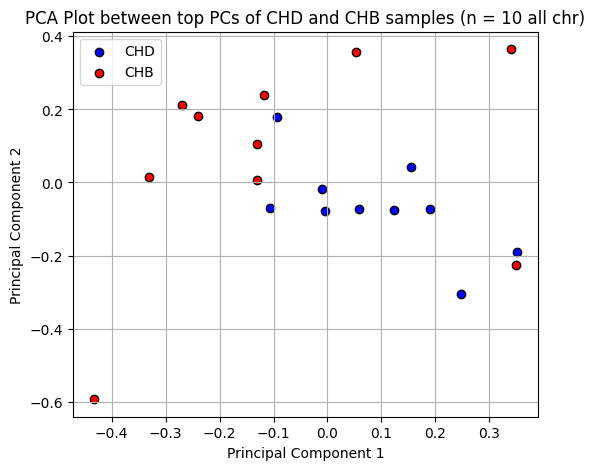

Power iteration: converged at iter=79
Power iteration: converged at iter=309
Power iteration: converged at iter=2
Power iteration: converged at iter=1921
Power iteration: converged at iter=1160
Power iteration: converged at iter=1
Power iteration: converged at iter=4857
Power iteration: converged at iter=70
Power iteration: converged at iter=104
Power iteration: converged at iter=1645


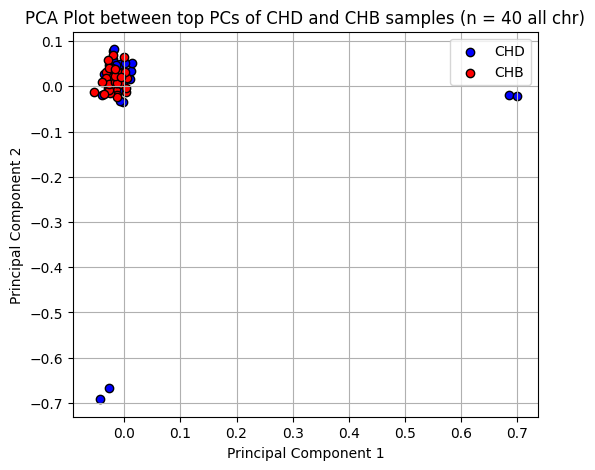

Power iteration: converged at iter=172
Power iteration: converged at iter=1
Power iteration: converged at iter=84
Power iteration: converged at iter=2050
Power iteration: converged at iter=19587
Power iteration: converged at iter=2
Power iteration: converged at iter=5060
Power iteration: converged at iter=1
Power iteration: converged at iter=6202
Power iteration: converged at iter=1


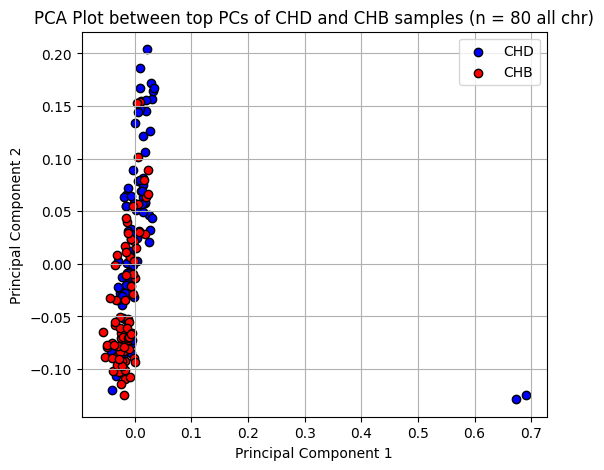

In [9]:
ns = [10,40,80]
distances = {}
for n in ns:
    DistanceRatio = GetPCandPlot_CHDCHBJPT(n)
    distances[n] = DistanceRatio

In [37]:
df = pd.DataFrame(distances).T
df.columns = ['CHD', 'CHB']
df['mean'] = df.mean(axis=1)
df

,CHD,CHB,mean
10,1.429771,0.730869,1.080320
40,0.408571,2.147731,1.278151
80,0.896781,1.326137,1.111459


### what would happen when you remove the outliers?

In [ ]:
#ind 2 and 17 seem to be outliers

In [12]:
n = 80
np.random.seed(42)
combined = GetCombinedGenoCHD_CHB(CHD, CHB, n)
top10PCs = RunPowerIteration10PCs(combined)

DistanceRatio = GetDistanceRatio(top10PCs, 2, n)
# Define indices for each population
CHD_indices = range(0, n)
CHB_indices = range(n, 2*n)
CHD_indices = np.delete(CHD_indices, [2, 17])
CHD_indices

Power iteration: converged at iter=172
Power iteration: converged at iter=1
Power iteration: converged at iter=84
Power iteration: converged at iter=2050
Power iteration: converged at iter=19587
Power iteration: converged at iter=2
Power iteration: converged at iter=5060
Power iteration: converged at iter=1
Power iteration: converged at iter=6202
Power iteration: converged at iter=1


array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79])

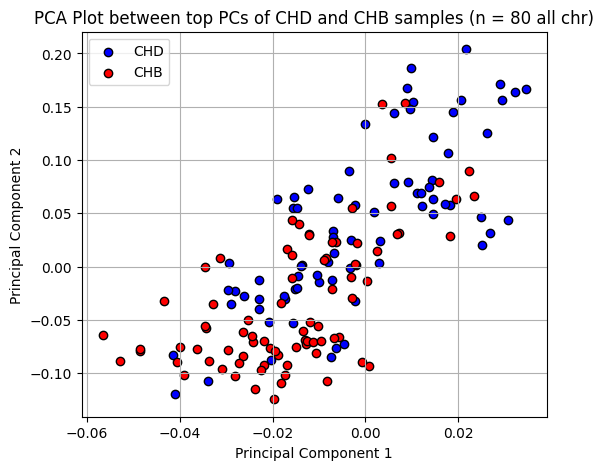

In [13]:
# Plot each population with a different color
plt.figure(figsize=(6, 5))

# CHD Population
plt.scatter(top10PCs[0][CHD_indices], top10PCs[1][CHD_indices], c='blue', label='CHD', edgecolor='k')
# CHB Population
plt.scatter(top10PCs[0][CHB_indices], top10PCs[1][CHB_indices], c='red', label='CHB', edgecolor='k')

# Add labels and title
plt.title("PCA Plot between top PCs of CHD and CHB samples (n = " + str(n) + " all chr)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

Chinese from Denver and Chinese from Beijing may be very similar